[Linear algebra on n-dimensional arrays](https://numpy.org/numpy-tutorials/content/tutorial-svd.html)

In [30]:
from scipy import misc

img = misc.face()
print(f"{type(img)=}")


type(img)=<class 'numpy.ndarray'>


/tmp/ipykernel_126105/3478314849.py:3: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  img = misc.face()


img.shape=(768, 1024, 3), img.ndim=3, len(img)=768, img.size=2359296


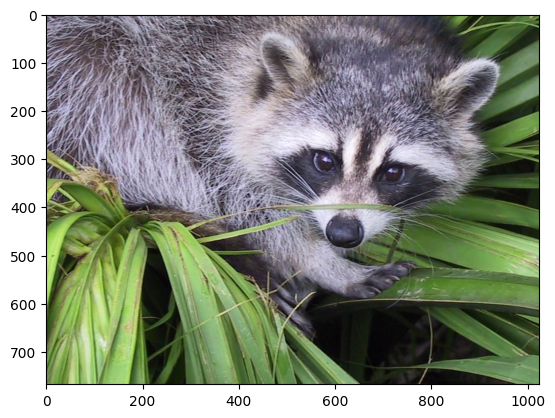

In [31]:
import matplotlib.pyplot as plt

print(f"{img.shape=}, {img.ndim=}, {len(img)=}, {img.size=}")

plt.imshow(img)


In [32]:
img_red = img[:, :, 0]
print(img_red.shape)
print(img_red)

(768, 1024)
[[121 138 153 ... 119 131 139]
 [ 89 110 130 ... 118 134 146]
 [ 73  94 115 ... 117 133 144]
 ...
 [ 87  94 107 ... 120 119 119]
 [ 85  95 112 ... 121 120 120]
 [ 85  97 111 ... 120 119 118]]


img_array.shape=(768, 1024, 3), img_array.dtype=dtype('float64')
img_gray.shape=(768, 1024)


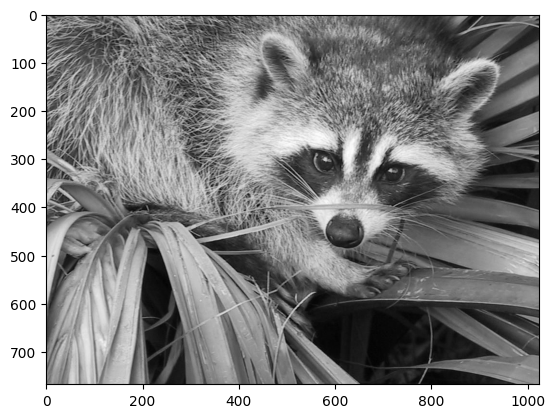

In [33]:
img_array = img / 255
print(f"{img_array.shape=}, {img_array.dtype=}")

img_gray = img_array @ [0.2126, 0.7152, 0.0722]
print(f"{img_gray.shape=}")

plt.imshow(img_gray, cmap="gray")


In [34]:
from numpy import linalg

U, s, Vt = linalg.svd(img_gray)
print(f"{U.shape=}, {s.shape=}, {Vt.shape=}")

import numpy as np

print(f"{np.count_nonzero(s)=}")

tops_sv = s[s > 10]
print(f"{tops_sv=}\n{tops_sv.size=}")

print(f"{s[-10:]=}")

sum_sv = s.sum()
percents_tops = [x / sum_sv for x in tops_sv]
print(f"{percents_tops=}\n{sum(percents_tops)=}")

U.shape=(768, 768), s.shape=(768,), Vt.shape=(1024, 1024)
np.count_nonzero(s)=768
tops_sv=array([410.42098224,  85.56090199,  63.61066707,  45.85114695,
        41.96884158,  38.25875097,  31.65941584,  27.22637539,
        26.52061638,  26.10815362,  23.42487722,  21.49916197,
        17.85652873,  17.37941645,  16.86574464,  16.26735411,
        15.48694805,  14.87815069,  14.11500662,  13.96559631,
        13.70732297,  12.75569782,  12.12907909,  11.97909232,
        11.38919277,  11.23491655,  11.03374003,  10.70472619,
        10.38856926,  10.24748813])
tops_sv.size=30
s[-10:]=array([0.01215173, 0.01201027, 0.01164519, 0.01142034, 0.01127394,
       0.01117286, 0.01085116, 0.01079159, 0.01031601, 0.00992525])
percents_tops=[0.19376783150342436, 0.04039498748401306, 0.030031849129839475, 0.021647229797237058, 0.019814316945622166, 0.01806271007834831, 0.014947033948382996, 0.012854108214356348, 0.01252090548193118, 0.012326173684191843, 0.011059346034947662, 0.010150177925764906,

prod.shape=(768, 1024)
1.4452998324881597e-12
True


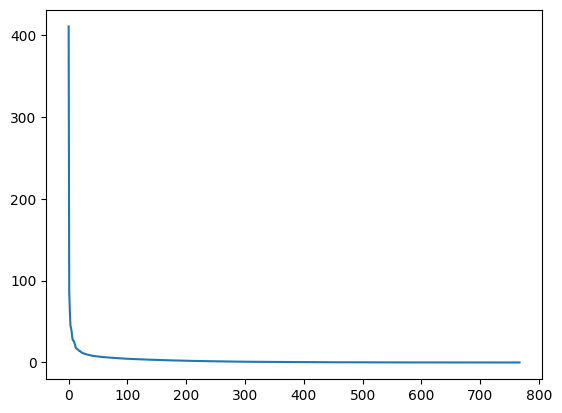

In [36]:
Sigma = np.zeros((U.shape[0], Vt.shape[0]))
np.fill_diagonal(Sigma, s)
prod = U @ Sigma @ Vt
print(f"{prod.shape=}")

print(linalg.norm(img_gray - prod))
print(np.allclose(img_gray, prod))

plt.plot(s)
plt.show()

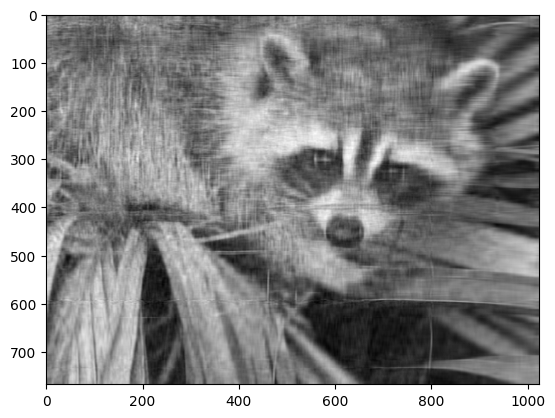

In [44]:
k = 30
approx = U @ Sigma[:, :k] @ Vt[:k, :]
plt.imshow(approx, cmap="gray")
plt.show()

img_array_transposed.shape=(3, 768, 1024)
U.shape=(3, 768, 768), s.shape=(3, 768), Vt.shape=(3, 1024, 1024)
reconstructed.shape=(3, 768, 1024)


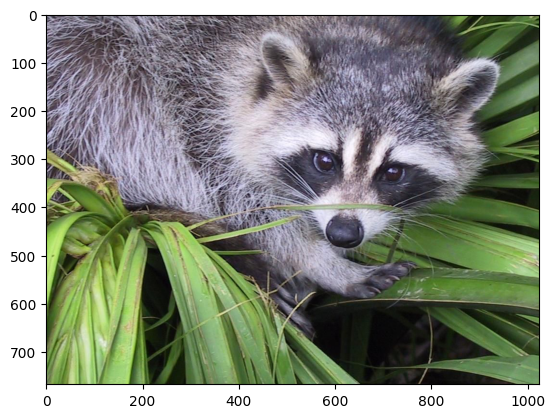

In [52]:
img_array_transposed = np.transpose(img_array, (2, 0, 1))
print(f"{img_array_transposed.shape=}")

U, s, Vt = linalg.svd(img_array_transposed)
print(f"{U.shape=}, {s.shape=}, {Vt.shape=}")

Sigma = np.zeros((3, 768, 1024))
for j in range(3):
    np.fill_diagonal(Sigma[j, :, :], s[j, :])

reconstructed = U @ Sigma @ Vt
print(f"{reconstructed.shape=}")

reconstructed = np.clip(reconstructed, 0, 1)
plt.imshow(np.transpose(reconstructed, (1, 2, 0)))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


approx_img.shape=(3, 768, 1024)


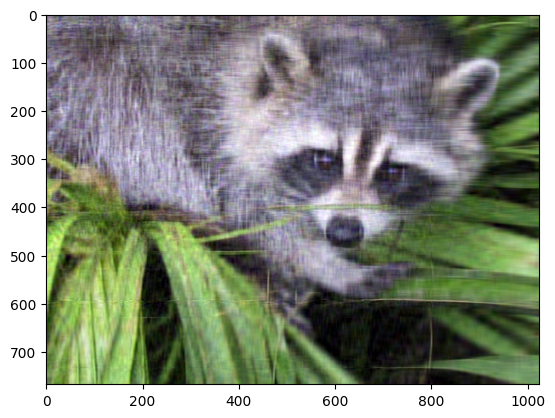

In [53]:
approx_img = U @ Sigma[..., :k] @ Vt[..., :k, :]
print(f"{approx_img.shape=}")

plt.imshow(np.transpose(approx_img, (1, 2, 0)))
plt.show()